In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import datetime

In [160]:
df_transaction = pd.read_csv('train_transaction.csv')
df_transaction_test = pd.read_csv("test_transaction.csv")

In [161]:
print(df_transaction.shape)
print(df_transaction_test.shape)

(590540, 394)
(506691, 393)


In [30]:
pd.options.display.max_columns = None
df_transaction.head(2)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [141]:
# only small percentage of values are fraudalent.
(df_transaction.isFraud.value_counts() / df_transaction.shape[0] ) *100

0    96.500999
1     3.499001
Name: isFraud, dtype: float64

In [103]:
# Model building

import sklearn 
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import statsmodels.api as stats
import matplotlib.pyplot as plt
import random 

class predictions(object):
    
    def __init__(self):
        return
    
    def encoding(self,df):
        self.obj = [columns for columns in df.columns if df[columns].dtypes=="object"]
        le = LabelEncoder()
        for col in self.obj:
            df[col] = le.fit_transform(df[col].astype("str").values)
        return df
    
    def feature_selection(self,df,num_features):
        df = df.fillna(0)
        best = SelectKBest(chi2,num_features)
        fit = best.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
        fit = pd.DataFrame(fit)
        return fit
    
    def normalize(self,df):
        df_fraud = df[df.isFraud==1]
        df_non_fraud = df[df.isFraud!=1]
        rand = random.sample(range(0,df_non_fraud.shape[0]),df_fraud.shape[0] + 11000 )
        df_non_fraud = df_non_fraud.iloc[rand]
        return pd.concat([df_non_fraud,df_fraud])
    
    def boosting(self,df,classes,df_test):
        df = df.fillna(0)
        df_test = df_test.fillna(0)
        
        train_x,test_x , train_y,test_y = train_test_split(df,classes, test_size=0.25, random_state=36)
        #smt = SMOTE()
        #train_x,train_y = smt.fit_sample(train_x,train_y)
        #train_x = pd.DataFrame(train_x)
        #train_x.columns = test_x.columns
        model = xgb.XGBClassifier(learning_rate =0.1,
                 n_estimators=1500,
                 max_depth=6,
                 min_child_weight=3,
                 gamma=0,
                 subsample=0.8,
                 colsample_bytree=0.8,
                                  reg_alpha=0.005,
                 objective= 'binary:logistic',
                 nthread=4,
                 scale_pos_weight=1,
                 seed=27)
                
        model.fit(train_x,train_y)
        pred_prob = model.predict_proba(test_x)
        pred_prob = pred_prob[:,1]
        pred = model.predict(test_x)
        acc = accuracy_score(test_y,pred)
        
        auc = roc_auc_score(test_y,pred)
        fpr, tpr, therashold = roc_curve(test_y,pred_prob)
        report = classification_report(pred,test_y)
        con_mat = confusion_matrix(test_y,pred)
        
        final_result = model.predict_proba(df_test)
                
        return auc, fpr,tpr,therashold, report, acc, con_mat, final_result
        
    
    def logistic(self,df,classes,df_test):
        df = df.fillna(0)
        df_test = df_test.fillna(0)

        train_x,test_x , train_y,test_y = train_test_split(df,classes,random_state=57,test_size=0.25)
        smt = SMOTE()
        train_x,train_y = smt.fit_sample(train_x,train_y)
        
        model = LogisticRegression()
        model.fit(train_x,train_y)
        pred_prob = model.predict_proba(test_x)
        pred_prob = pred_prob[:,1]
        pred = model.predict(test_x)
        acc = accuracy_score(test_y,pred)
        
        auc = roc_auc_score(test_y,pred)
        fpr, tpr, therashold = roc_curve(test_y,pred_prob)
        report = classification_report(pred,test_y)
        con_mat = confusion_matrix(test_y,pred)
        
        final_result = model.predict_proba(df_test)
        
        return auc, fpr,tpr,therashold, report, acc, con_mat, final_result

    
    def randomforest(self,df,classes,df_test):
        df = df.fillna(0)
        df_test = df_test.fillna(0)
        
        train_x,test_x , train_y,test_y = train_test_split(df,classes,random_state=57,test_size=0.3)
        model = RandomForestClassifier(n_estimators=50,max_depth=3,random_state=0)
        model.fit(train_x,train_y)
        pred_prob = model.predict_proba(test_x)
        pred_prob = pred_prob[:,1]
        pred = model.predict(test_x)
        acc = accuracy_score(test_y,pred)
        
        auc = roc_auc_score(test_y,pred)
        fpr, tpr, therashold = roc_curve(test_y,pred_prob)
        report = classification_report(pred,test_y)
        con_mat = confusion_matrix(test_y,pred)
        
        final_result = model.predict_proba(df_test)
        
        return auc, fpr,tpr,therashold, report, acc, con_mat, final_result


In [ ]:
print("final accuracy is {}".format(sess.run(accuracy,feed_dict={X:test_x,Y_class:test_y})))

In [132]:
import warnings
warnings.filterwarnings("ignore")

pred = predictions()
df = pred.normalize(df_transaction)
df = pred.encoding(df)
test = pred.encoding(df_transaction_test)
df = df.drop(["isFraud"],axis=1)
#df = pred.feature_selection(df,100)
df["isFraud"] = df_transaction.isFraud
auc, fpr,tpr,therashold, report, accuracy, con_mat, final_result = pred.logistic(df.iloc[:,:-1],df.isFraud,df_transaction_test)


Area Under the Curve = 70.47% 


Text(0, 0.5, 'True Positive Rate')

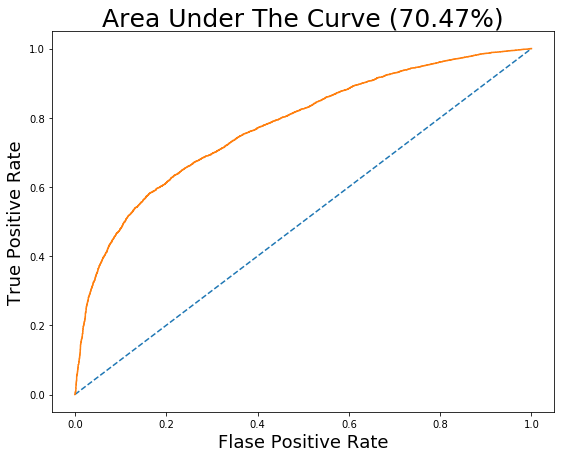

In [133]:
print("Area Under the Curve = {}% ".format(round(auc*100,2)))
plt.figure(figsize=(9,7))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr)
plt.title("Area Under The Curve ({}%)".format(round(auc*100,2)),size=25)
plt.xlabel("Flase Positive Rate",size=18)
plt.ylabel("True Positive Rate",size=18)

In [134]:
print("total accuracy of Logistic Regression = {}% \n".format(round(accuracy,2)))
print(report)

total accuracy of Logistic Regression = 0.71% 

              precision    recall  f1-score   support

           0       0.74      0.77      0.76      7525
           1       0.67      0.63      0.65      5557

    accuracy                           0.71     13082
   macro avg       0.70      0.70      0.70     13082
weighted avg       0.71      0.71      0.71     13082



In [135]:
con_mat = pd.DataFrame(con_mat)
con_mat.index =  ["Not_fraudalent","Fraudalent"]
con_mat.columns = ["True","Flase"]
con_mat

,True,Flase
Not_fraudalent,5822,2071
Fraudalent,1703,3486


In [136]:
pred = predictions()
df = pred.normalize(df_transaction)
df = pred.encoding(df)
test = pred.encoding(df_transaction_test)
df = df.drop(["isFraud"],axis=1)
#df = pred.feature_selection(df,100)
df["isFraud"] = df_transaction.isFraud
auc, fpr,tpr,therashold, report, accuracy, con_mat, final_result = pred.randomforest(df.iloc[:,:-1],df.isFraud,df_transaction_test)

Area Under the Curve = 69.58% 


Text(0, 0.5, 'True Positive Rate')

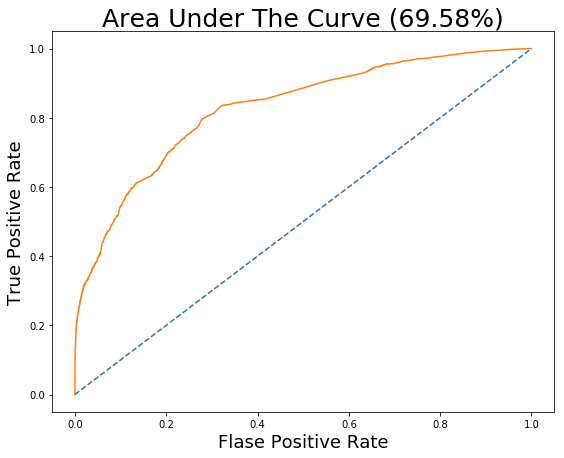

In [137]:
print("Area Under the Curve = {}% ".format(round(auc*100,2)))
plt.figure(figsize=(9,7))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr)
plt.title("Area Under The Curve ({}%)".format(round(auc*100,2)),size=25)
plt.xlabel("Flase Positive Rate",size=18)
plt.ylabel("True Positive Rate",size=18)

In [138]:
print("total accuracy = {}% \n".format(round(accuracy,2)))
print(report)

total accuracy = 0.74% 

              precision    recall  f1-score   support

           0       0.93      0.72      0.82     12209
           1       0.46      0.82      0.59      3489

    accuracy                           0.74     15698
   macro avg       0.70      0.77      0.70     15698
weighted avg       0.83      0.74      0.76     15698



In [139]:
con_mat = pd.DataFrame(con_mat)
con_mat.index =  ["Not_fraudalent","Fraudalent"]
con_mat.columns = ["True","Flase"]
con_mat

,True,Flase
Not_fraudalent,8838,634
Fraudalent,3371,2855


In [127]:
pred = predictions()
df = pred.normalize(df_transaction)
df = pred.encoding(df)
test = pred.encoding(df_transaction_test)
df = df.drop(["isFraud"],axis=1)
#df = pred.feature_selection(df,100)
df["isFraud"] = df_transaction.isFraud
auc, fpr,tpr,therashold, report, accuracy, con_mat, final_result = pred.boosting(df.iloc[:,:-1],df.isFraud,df_transaction_test)

Area Under the Curve = 89.28% 


Text(0, 0.5, 'True Positive Rate')

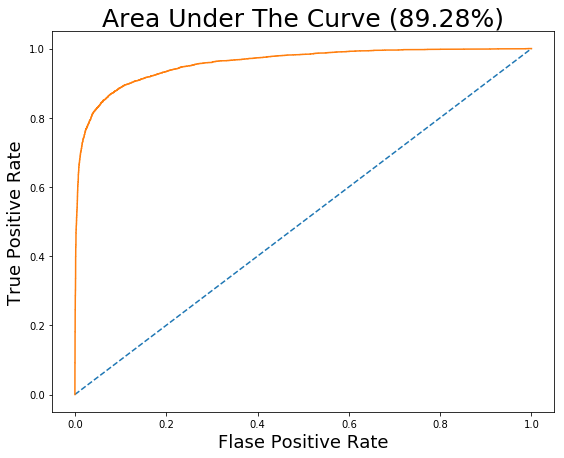

In [128]:
print("Area Under the Curve = {}% ".format(round(auc*100,2)))
plt.figure(figsize=(9,7))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr)
plt.title("Area Under The Curve ({}%)".format(round(auc*100,2)),size=25)
plt.xlabel("Flase Positive Rate",size=18)
plt.ylabel("True Positive Rate",size=18)

In [130]:
print("total accuracy = {}% \n".format(round(accuracy*100,2)))
print(report)

total accuracy = 90.3% 

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      8260
           1       0.84      0.90      0.87      4822

    accuracy                           0.90     13082
   macro avg       0.89      0.90      0.90     13082
weighted avg       0.91      0.90      0.90     13082



In [131]:
con_mat = pd.DataFrame(con_mat)
con_mat.index =  ["Not_fraudalent","Fraudalent"]
con_mat.columns = ["True","Flase"]
con_mat

,True,Flase
Not_fraudalent,7458,467
Fraudalent,802,4355


In [49]:
final_test_predictions = pd.read_csv("sample_submission.csv")
final_test_predictions.isFraud = 1 - final_result

In [50]:
final_test_predictions.head()

,TransactionID,isFraud
0,3663549,0.032466
1,3663550,0.007985
2,3663551,0.065549
3,3663552,0.003804
4,3663553,0.001581


In [51]:
final_test_predictions.to_csv("sub.csv",index=False)